In [11]:
import pandas as pd
import numpy as np
from keras.datasets import mnist
from sklearn.decomposition.pca import PCA
import matplotlib.pyplot as plt

In [3]:
((X_train, y_train), (X_test, y_test)) = mnist.load_data()

In [15]:
pca_model = PCA(n_components=80)

In [16]:
X_mod = pca_model.fit_transform(X_train.reshape(-1, 784))

In [17]:
X_mod.shape

(60000, 80)

In [18]:
pca_model.components_.shape

(80, 784)

In [19]:
X_gen = np.dot(X_mod, pca_model.components_)

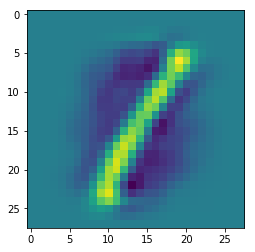

In [22]:
plt.imshow(X_gen[3].reshape(28, 28))

In [23]:
y_train[3]

1

In [85]:
from keras.layers import Dense, Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model

In [31]:
# X_modified = X_train.reshape(-1, 784) / 255

# X_modified.max()

# plt.imshow(X_modified[3].reshape(28, 28))



In [59]:
in_layer = Input(shape=(784,))
d1 = Dense(400, activation="relu")(in_layer)
d2 = Dense(100, activation="relu")(d1)
d3 = Dense(50, activation="relu")(d2)
d4 = Dense(100, activation="relu")(d3)
d5 = Dense(400, activation="relu")(d4)
d6 = Dense(784, activation="sigmoid")(d5)

In [60]:
model = Model(in_layer, d6)

In [61]:
model.compile(optimizer="adadelta", loss="binary_crossentropy", metrics=["accuracy"])

In [71]:
model.fit(X_modified, X_modified, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 15s 244us/step - loss: -6.0183 - acc: 0.0000e+00
Epoch 2/5
60000/60000 [==============================] - 13s 210us/step - loss: -6.1209 - acc: 0.0000e+00
Epoch 3/5
60000/60000 [==============================] - 14s 239us/step - loss: -6.2851 - acc: 0.0000e+00
Epoch 4/5
60000/60000 [==============================] - 15s 247us/step - loss: -6.3785 - acc: 0.0000e+00
Epoch 5/5
60000/60000 [==============================] - 16s 265us/step - loss: -6.4177 - acc: 0.0000e+00


In [79]:
out = model.predict(X_modified[:10])

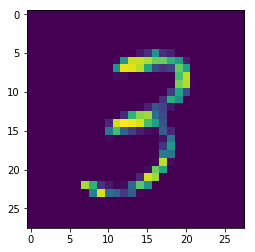

In [82]:
plt.imshow(out[7].reshape(28, 28))

In [86]:
input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(1, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 1) i.e. 16-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

In [90]:
model_conv = Model(input_img, decoded)

model_conv.compile(optimizer="adadelta", loss="binary_crossentropy", metrics=["accuracy"])

In [92]:
model_conv.fit(X_train.reshape(-1, 28, 28, 1)/255, X_train.reshape(-1, 28, 28, 1)/255, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 42s 708us/step - loss: 0.1605 - acc: 0.8002
Epoch 2/5
60000/60000 [==============================] - 40s 660us/step - loss: 0.1239 - acc: 0.8077
Epoch 3/5
60000/60000 [==============================] - 43s 723us/step - loss: 0.1158 - acc: 0.8095
Epoch 4/5
60000/60000 [==============================] - 47s 784us/step - loss: 0.1111 - acc: 0.8105
Epoch 5/5
60000/60000 [==============================] - 43s 714us/step - loss: 0.1082 - acc: 0.8111


In [94]:
out = model_conv.predict(X_train.reshape(-1, 28, 28, 1)[:10])

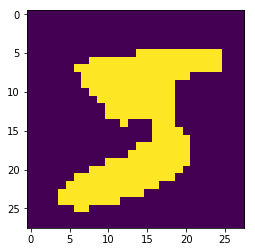

In [97]:
plt.imshow(out[0].reshape(28, 28))

In [98]:
model_conv.layers

In [100]:
encoder = Model(model_conv.input, model_conv.layers[6].output)

In [104]:
# encoder.summary()

In [103]:
encoder.compile(optimizer="adadelta", loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
encoder()